### Advance Linear Regression Assignment

#### Context
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.  <br>
The company is looking at prospective properties to buy to enter the market. It is required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.<br>

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

#### Business Goal
It is required tobuild a model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [678]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score,mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [679]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [680]:
# set up display area to show dataframe in jupyter qtconsole

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [681]:
# loading data to dataframe
housing = pd.read_csv("train.csv", sep=",")
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [682]:
# reading data
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [683]:
# Looking at all the column names
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [684]:
# checking shape 
housing.shape

(1460, 81)

In [685]:
# dropping duplicates
housing.drop_duplicates(inplace=True)

In [686]:
# checking shape after removinf duplicate
housing.shape

(1460, 81)

In [687]:
# summarising number of missing values in each column
print(housing.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [688]:
# calculating missing values data
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


#### Imputing null values
With data this large, it is not surprising that there are a lot of missing values in the cells. In order to effectively train our model we build, we must first deal with the missing values. There are missing values for both numerical and categorical data. We will see how to deal with both.

For numerical imputing, we would typically fill the missing values with a measure like median, mean, or mode. For categorical imputing, I chose to fill the missing values with the most common term that appeared from the entire column. There are other ways to do the imputing though, and I ecnourage you to test out your own creative ways!

#### Places Where NaN Means Something
If you look at the data description file provided, you will see that for some categories, NaN actually means something. This means that if a value is NaN, the house might not have that certain attribute, which will affect the price of the house. Therefore, it is better to not drop, but fill in the null cell with a value called "None" which serves as its own category.

In [689]:
# NA meaning for the metadata listed
na_has_meaning = ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Alley","FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [690]:
# update NA with none for the attribute where na has meaning
for i in na_has_meaning:
    housing[i].fillna("None", inplace=True)
    housing[i].fillna("None", inplace=True)

In [691]:
# checking info of dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [692]:
# checking missing values data
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(7)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000
GarageType,0,0.000000


#### Imputing real nan values

In [693]:
imputer = SimpleImputer(missing_values = np.nan, strategy="median")

In [694]:
# LotFrontage has many null values so better to drop this column
housing.drop("LotFrontage", axis=1, inplace=True)

In [695]:
#missing data
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000


GarageYrBlt, MasVnrArea  has less missing values so we can impute it with median. MasVnrType to none

In [696]:
housing["GarageYrBlt"].fillna(housing["GarageYrBlt"].median(), inplace=True)
housing["MasVnrArea"].fillna(housing["MasVnrArea"].median(), inplace=True)
housing["MasVnrType"].fillna("None", inplace=True)

In [697]:
#missing data
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Electrical,1,0.000685
MSSubClass,0,0.000000
GarageYrBlt,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000


In [698]:
#Electrical has only 1 data missing so we will drop it
housing.dropna(inplace=True)

In [699]:
#missing data
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Id,0,0.0
MSSubClass,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0


In [700]:
# drop id columns as it has no use
housing.drop("Id", axis=1, inplace=True)

In [701]:
# checking dataset info
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   object 
 4   Alley          1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

Now there is no null entries in any columns

In [702]:
# get columns as per their types
types_train = housing.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == 'int64') | (types_train == float)] #numerical values are either type int or float
cat_train = types_train[types_train == object] #categorical values are type object

In [703]:
#convert num_train to a list to make it easier to work with
numerical_values_train = list(num_train.index)
print(numerical_values_train)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [704]:
#convert cat_train to a list to make it easier to work with
cat_values_train = list(cat_train.index)
print(cat_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [705]:
#understanding relationship with target variables

<Axes: xlabel='SalePrice', ylabel='Density'>

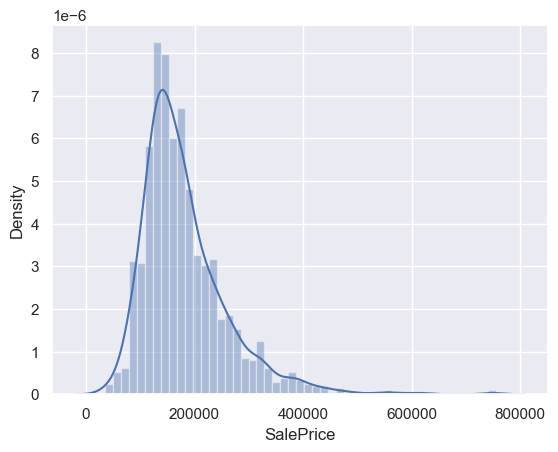

In [706]:
# variation in sales price
sns.distplot(housing['SalePrice'])

Most of the sales price lies between 15l-20l

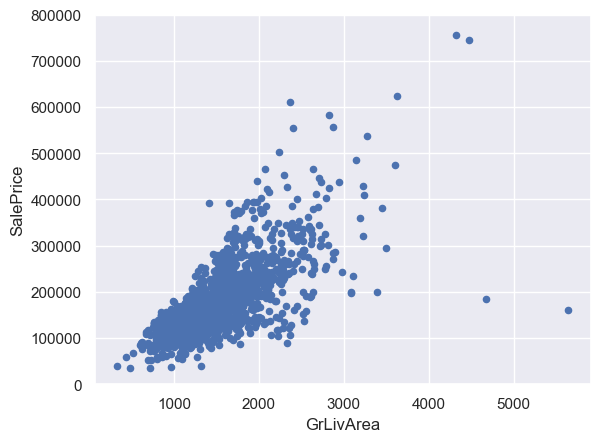

In [707]:
# GrLivArea vs Sale Price
var = 'GrLivArea'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Sale Price increases with increase of GrLivArea

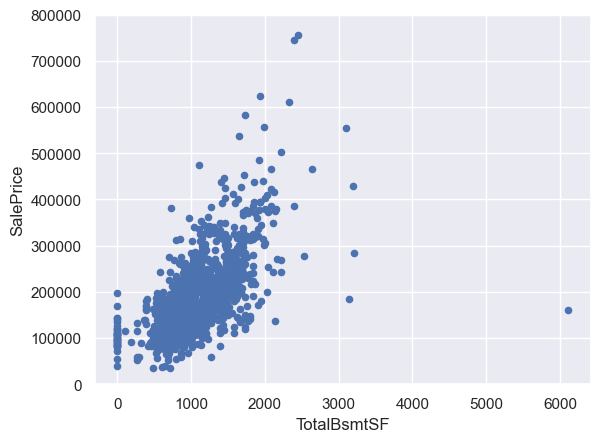

In [708]:
#TotalBsmtSF vs SalePrice
var = 'TotalBsmtSF'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Sales Price increses with increase of TotalBsmtSF

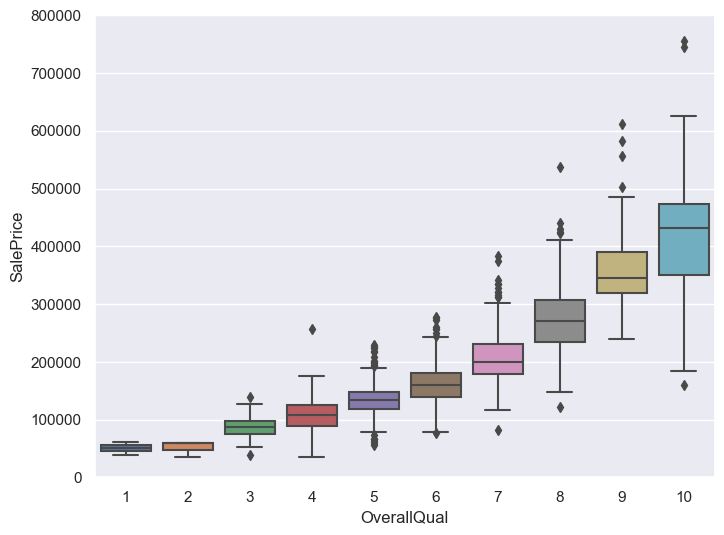

In [709]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Sale price increases with increase in quality

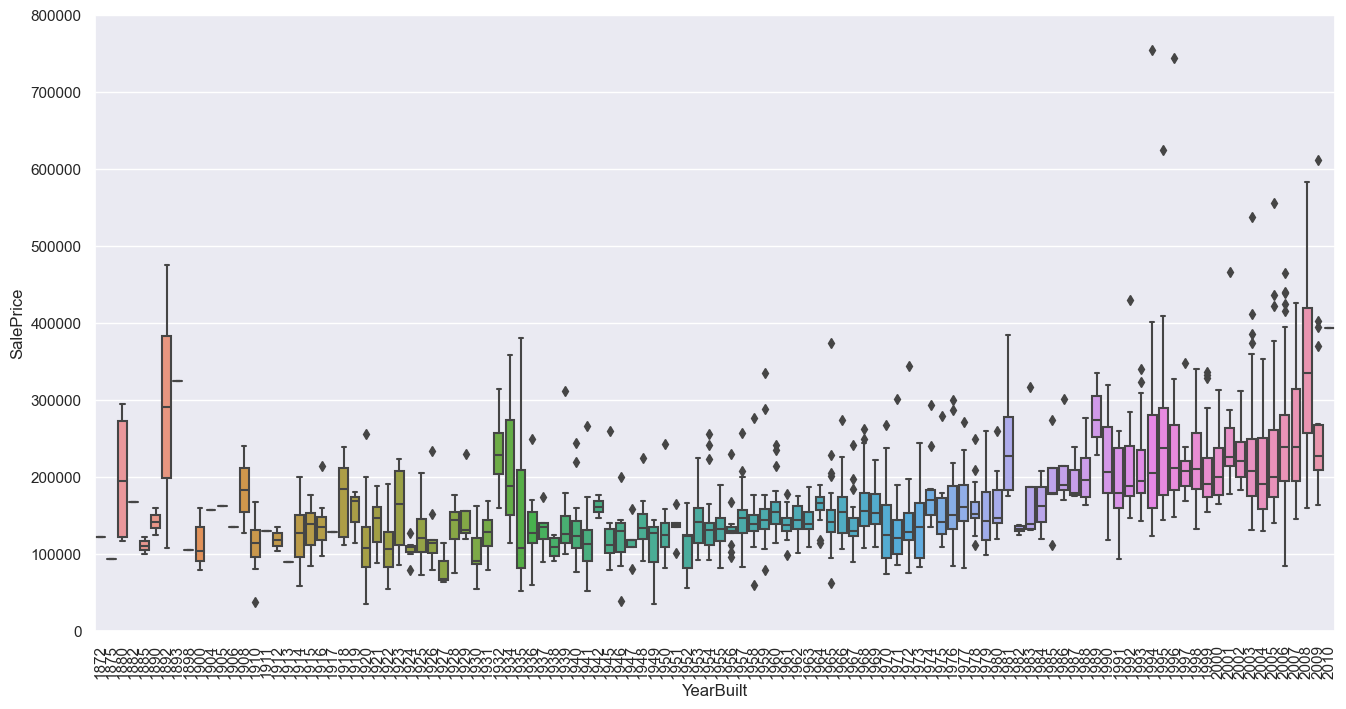

In [710]:
# Year Built vs SalePrice
var = 'YearBuilt'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

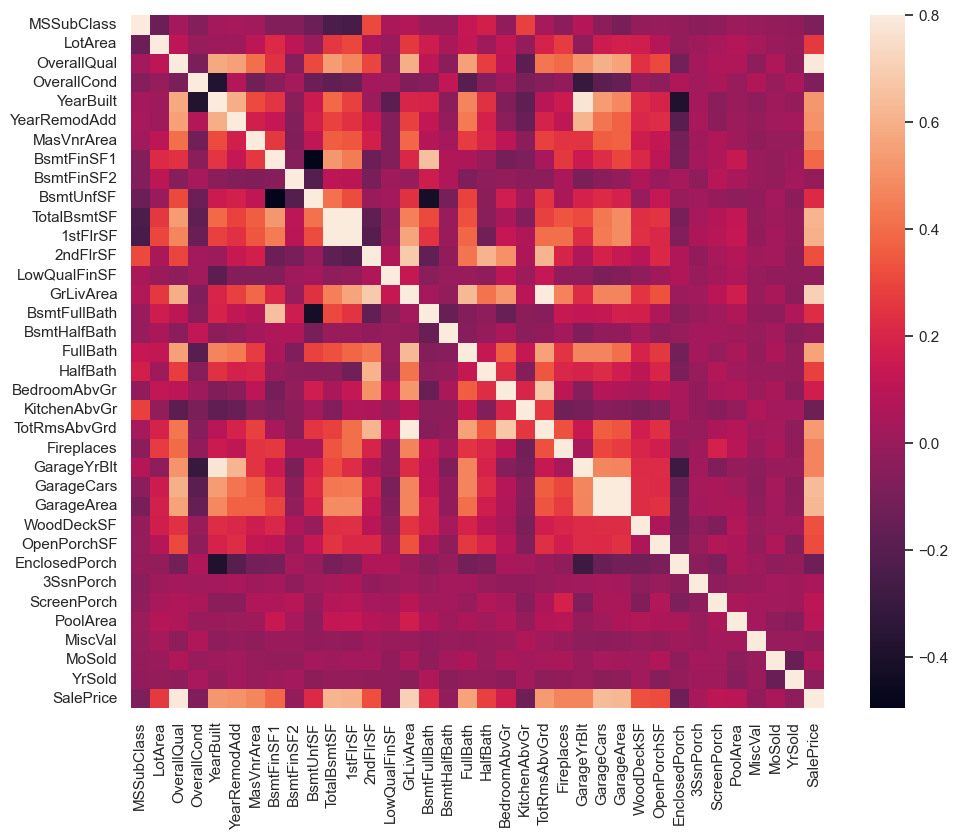

In [711]:
#correlation matrix
corrmat = housing.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

There is strong correlation with multile variables

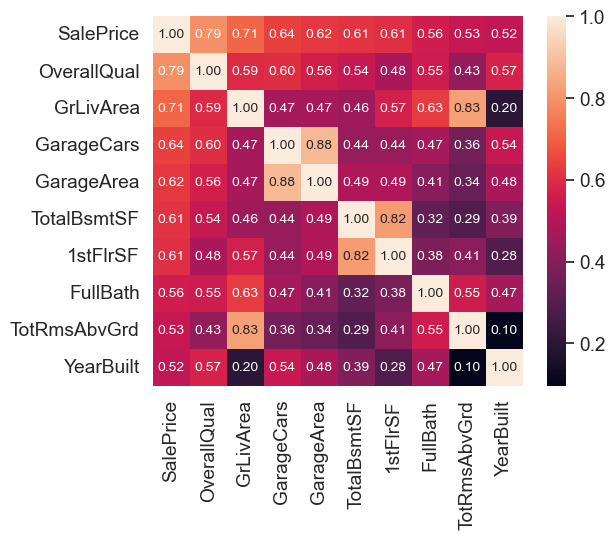

In [712]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

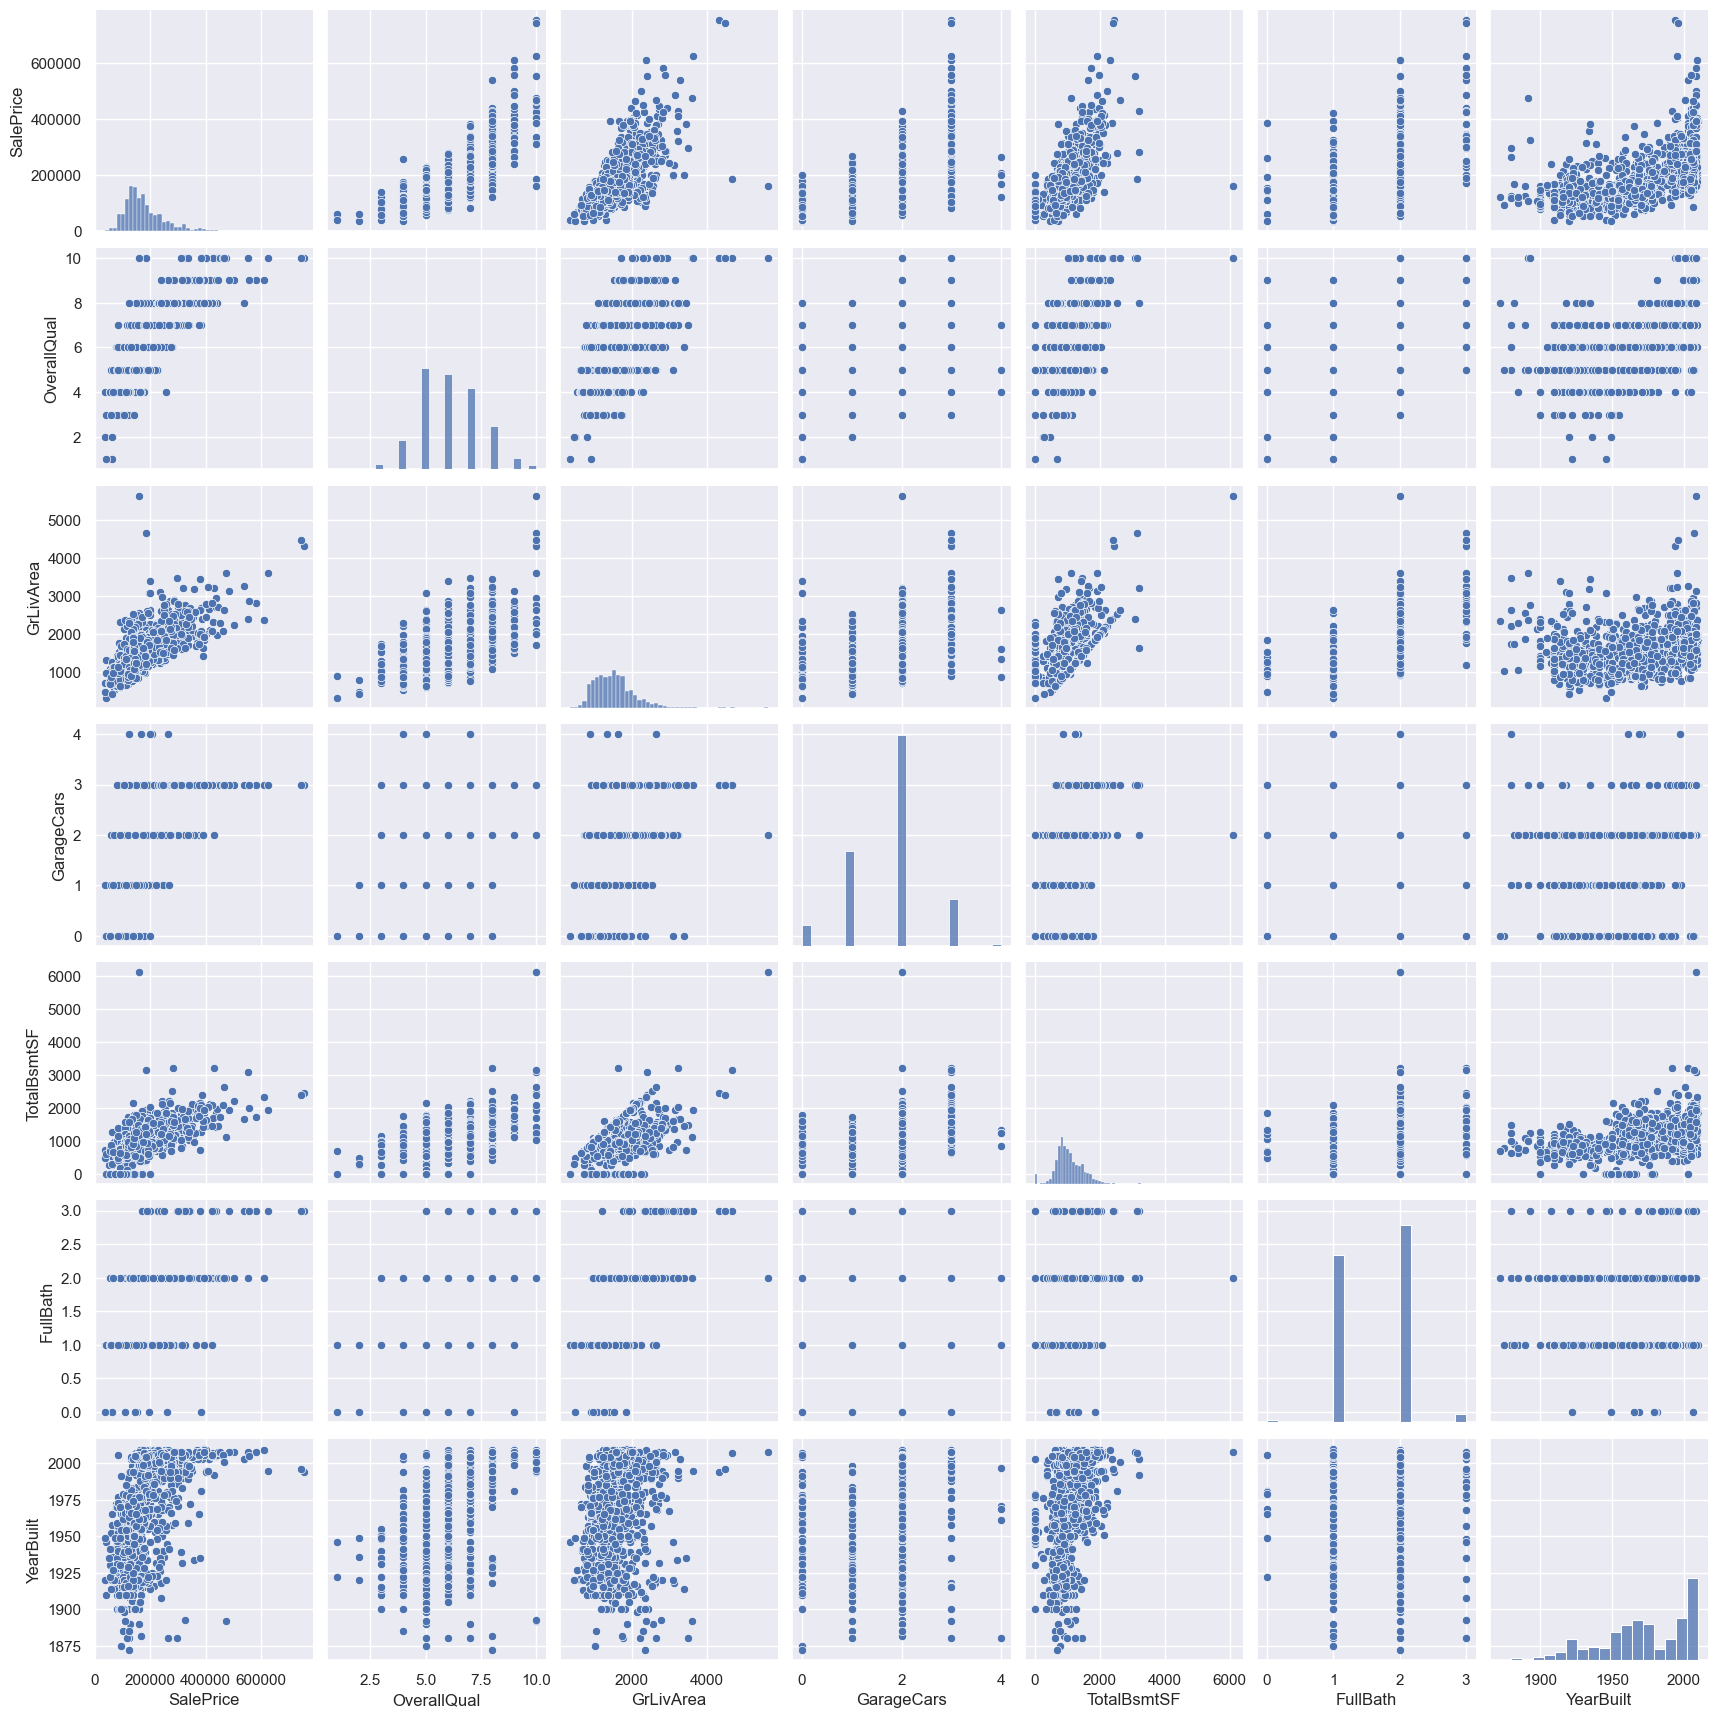

In [713]:
#scatterplot to see the trend with highly correlated variables
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing[cols], size = 2.5)
plt.show();

#### Dummy Varibales Creation

In [714]:
#create dummy variables for 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
#'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'
#, 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
#'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
#'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 
#'SaleCondition'

MSZoning_d = pd.get_dummies(housing['MSZoning'], drop_first = True, prefix= "MSZoning")
Street_d = pd.get_dummies(housing['Street'], drop_first = True, prefix= "Street")
Alley_d = pd.get_dummies(housing['Alley'], drop_first = True, prefix= "Alley")
LotShape_d = pd.get_dummies(housing['LotShape'], drop_first = True, prefix= "LotShape")
LandContour_d = pd.get_dummies(housing['LandContour'], drop_first = True, prefix= "LandContour")
Utilities_d = pd.get_dummies(housing['Utilities'], drop_first = True, prefix= "Utilities")
LotConfig_d = pd.get_dummies(housing['LotConfig'], drop_first = True, prefix= "LotConfig")
LandSlope_d = pd.get_dummies(housing['LandSlope'], drop_first = True, prefix= "LandSlope")
Neighborhood_d = pd.get_dummies(housing['Neighborhood'], drop_first = True, prefix= "Neighborhood")
Condition1_d = pd.get_dummies(housing['Condition1'], drop_first = True, prefix= "Condition1")
Condition2_d = pd.get_dummies(housing['Condition2'], drop_first = True, prefix= "Condition2")
BldgType_d = pd.get_dummies(housing['BldgType'], drop_first = True, prefix= "BldgType")
HouseStyle_d = pd.get_dummies(housing['HouseStyle'], drop_first = True, prefix= "HouseStyle")
RoofStyle_d = pd.get_dummies(housing['RoofStyle'], drop_first = True, prefix= "RoofStyle")
RoofMatl_d = pd.get_dummies(housing['RoofMatl'], drop_first = True, prefix= "RoofMatl")
Exterior1st_d = pd.get_dummies(housing['Exterior1st'], drop_first = True, prefix= "Exterior1st")
Exterior2nd_d = pd.get_dummies(housing['Exterior2nd'], drop_first = True, prefix= "Exterior2nd")
MasVnrType_d = pd.get_dummies(housing['MasVnrType'], drop_first = True, prefix= "MasVnrType")
ExterQual_d = pd.get_dummies(housing['ExterQual'], drop_first = True, prefix= "ExterQual")
ExterCond_d = pd.get_dummies(housing['ExterCond'], drop_first = True, prefix= "ExterCond")
Foundation_d = pd.get_dummies(housing['Foundation'], drop_first = True, prefix= "Foundation")
BsmtQual_d = pd.get_dummies(housing['BsmtQual'], drop_first = True, prefix= "BsmtQual")
BsmtCond_d = pd.get_dummies(housing['BsmtCond'], drop_first = True, prefix= "BsmtCond")
BsmtExposure_d = pd.get_dummies(housing['BsmtExposure'], drop_first = True, prefix= "BsmtExposure")
BsmtFinType1_d = pd.get_dummies(housing['BsmtFinType1'], drop_first = True, prefix= "BsmtFinType1")
BsmtFinType2_d = pd.get_dummies(housing['BsmtFinType2'], drop_first = True, prefix= "BsmtFinType2")
Heating_d = pd.get_dummies(housing['Heating'], drop_first = True, prefix= "Heating")
HeatingQC_d = pd.get_dummies(housing['HeatingQC'], drop_first = True, prefix= "HeatingQC")
CentralAir_d = pd.get_dummies(housing['CentralAir'], drop_first = True, prefix= "CentralAir")
Electrical_d = pd.get_dummies(housing['Electrical'], drop_first = True, prefix= "Electrical")
KitchenQual_d = pd.get_dummies(housing['KitchenQual'], drop_first = True, prefix= "KitchenQual")
Functional_d = pd.get_dummies(housing['Functional'], drop_first = True, prefix= "Functional")
FireplaceQu_d = pd.get_dummies(housing['FireplaceQu'], drop_first = True, prefix= "FireplaceQu")
GarageType_d = pd.get_dummies(housing['GarageType'], drop_first = True, prefix= "GarageType")
GarageFinish_d = pd.get_dummies(housing['GarageFinish'], drop_first = True, prefix= "GarageFinish")
GarageQual_d = pd.get_dummies(housing['GarageQual'], drop_first = True, prefix= "GarageQual")
GarageCond_d = pd.get_dummies(housing['GarageCond'], drop_first = True, prefix= "GarageCond")
PavedDrive_d = pd.get_dummies(housing['PavedDrive'], drop_first = True, prefix= "PavedDrive")
PoolQC_d = pd.get_dummies(housing['PoolQC'], drop_first = True, prefix= "PoolQC")
Fence_d = pd.get_dummies(housing['Fence'], drop_first = True, prefix= "Fence")
MiscFeature_d = pd.get_dummies(housing['MiscFeature'], drop_first = True, prefix= "MiscFeature")
SaleType_d = pd.get_dummies(housing['SaleType'], drop_first = True, prefix= "SaleType")
SaleCondition_d = pd.get_dummies(housing['SaleCondition'], drop_first = True, prefix= "SaleCondition")

In [715]:
MSZoning_d.dtypes

MSZoning_FV    uint8
MSZoning_RH    uint8
MSZoning_RL    uint8
MSZoning_RM    uint8
dtype: object

In [716]:
# cancate the dummy data
df_d=  pd.concat([MSZoning_d,Street_d,Alley_d,LotShape_d,LandContour_d,Utilities_d,LotConfig_d,LandSlope_d,Neighborhood_d,Condition1_d,Condition2_d,BldgType_d,HouseStyle_d,RoofStyle_d,
RoofMatl_d,Exterior1st_d,Exterior2nd_d,MasVnrType_d,ExterQual_d,ExterCond_d,Foundation_d,BsmtQual_d,BsmtCond_d,BsmtExposure_d,BsmtFinType1_d,BsmtFinType2_d,Heating_d,HeatingQC_d,CentralAir_d,Electrical_d,KitchenQual_d,Functional_d,FireplaceQu_d,GarageType_d,GarageFinish_d,GarageQual_d,GarageCond_d,PavedDrive_d,PoolQC_d,Fence_d,MiscFeature_d,SaleType_d,SaleCondition_d], axis = 1)


In [717]:
# cancatenate the data in main dataframe
housing = pd.concat([housing,df_d],axis=1)
housing.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [718]:
# Drop columns for which we have created the dummies for it

housing.drop(['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition'], axis = 1, inplace = True)

In [719]:
# check the new shape
housing.shape

(1459, 259)

In [720]:
# check data types
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 259 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(2), int64(34), uint8(223)
memory usage: 739.5 KB


In [721]:
housing.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,1,0,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,1,0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


####  Splitting the Data into Training and Testing Sets

In [722]:
# create test and train dataset

np.random.seed(0)
housing_train, housing_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [723]:
#check train dataframe shape
housing_train.shape

(1021, 259)

In [724]:
#check test dataframe shape
housing_test.shape

(438, 259)

#### Rescaling the Features

In [725]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [726]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

housing_train[numerical_values_train] = scaler.fit_transform(housing_train[numerical_values_train])

In [727]:
# check data
housing_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
984,0.411765,0.040455,0.444444,0.500,0.760870,0.450000,0.000,0.000000,0.000000,0.000000,0.000000,0.215278,0.209201,0.0,0.249039,0.000000,0.0,0.666667,0.0,0.500,0.666667,0.454545,0.000000,0.700000,0.50,0.380113,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.636364,0.75,0.126510,0,0,1,0,1,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1416,1.000000,0.046139,0.333333,0.625,0.094203,0.000000,0.000,0.000000,0.000000,0.332620,0.127169,0.202315,0.505569,0.0,0.355880,0.000000,0.0,0.666667,0.0,0.500,0.666667,0.727273,0.000000,0.645455,0.50,0.394922,0.000000,0.00000,0.206522,0.0,0.0,0.0,0.0,0.272727,1.00,0.121650,0,0,0,1,1,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
390,0.176471,0.032409,0.444444,0.875,0.202899,0.000000,0.000,0.042700,0.265265,0.098031,0.140917,0.136343,0.196610,0.0,0.178517,0.333333,0.0,0.333333,0.0,0.500,0.333333,0.363636,0.000000,0.709091,0.25,0.270804,0.000000,0.23766,0.202899,0.0,0.0,0.0,0.0,0.272727,0.50,0.116789,0,0,1,0,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
877,0.235294,0.034416,0.888889,0.500,0.956522,0.916667,0.135,0.207300,0.000000,0.125000,0.239280,0.252315,0.369007,0.0,0.343198,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.636364,0.333333,0.945455,0.75,0.520451,0.214702,0.00000,0.000000,0.0,0.0,0.0,0.0,0.454545,0.75,0.437578,0,0,1,0,1,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
567,0.000000,0.040670,0.666667,0.500,0.956522,0.900000,0.105,0.000354,0.000000,0.648545,0.248282,0.269213,0.000000,0.0,0.210799,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.363636,0.000000,0.945455,0.50,0.375176,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.181818,1.00,0.248715,0,0,1,0,1,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [728]:
# check data types
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 984 to 792
Columns: 259 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(36), uint8(223)
memory usage: 517.5 KB


In [729]:
#dataset description
housing_train.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.217952,0.042862,0.568071,0.571376,0.717633,0.573180,0.065392,0.078119,0.034594,0.243378,0.173555,0.185720,0.165724,0.011340,0.208373,0.143976,0.029383,0.521384,0.186582,0.356513,0.348351,0.320185,0.208293,0.712893,0.443193,0.334135,0.108930,0.090376,0.042082,0.007456,0.030591,0.002730,0.002582,0.479031,0.452498,0.204566,0.046033,0.009794,0.784525,0.151812,0.994123,0.934378,0.026445,0.027424,0.007835,0.634672,0.031342,0.025465,0.900098,0.000979,...,0.020568,0.269344,0.464251,0.010774,0.214496,0.600392,0.013712,0.062684,0.006856,0.258570,0.053869,0.053869,0.287953,0.408423,0.034280,0.005877,0.053869,0.001959,0.903036,0.027424,0.005877,0.053869,0.003918,0.907933,0.020568,0.913810,0.0,0.000979,0.997062,0.037218,0.108717,0.006856,0.810970,0.962782,0.001959,0.034280,0.0,0.002938,0.001959,0.006856,0.003918,0.004897,0.088149,0.001959,0.856024,0.003918,0.007835,0.012733,0.813908,0.088149
std,0.246233,0.048898,0.156519,0.139376,0.221331,0.349893,0.117698,0.083929,0.115514,0.192398,0.076356,0.092401,0.211071,0.092088,0.101823,0.174183,0.121746,0.184074,0.246954,0.102561,0.072256,0.146497,0.216259,0.220193,0.188076,0.152272,0.149347,0.128769,0.114615,0.061580,0.112109,0.050405,0.033239,0.248393,0.334233,0.113203,0.209660,0.098529,0.411353,0.359014,0.076471,0.247741,0.160532,0.163396,0.088214,0.481758,0.174325,0.157611,0.300016,0.031296,...,0.142003,0.443836,0.498965,0.103287,0.410673,0.490058,0.116350,0.242512,0.082557,0.438063,0.2

#### Training The Model

In [730]:
#create X_train,y_train 
#SalesPrice is out Target/dependent Variable
y_train = housing_train.pop('SalePrice')
X_train = housing_train

In [731]:
X_train.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=258)

#### Building a linear model using RFE

In [732]:
# Using Recursive feature elimination to build model
#Selecting 30 feature to buid the model

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=30)
rfe = rfe.fit(X_train, y_train)

In [733]:
#list of parameter used for RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 42),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 126),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 6),
 ('BsmtUnfSF', False, 5),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 24),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 139),
 ('BsmtHalfBath', False, 150),
 ('FullBath', False, 69),
 ('HalfBath', False, 151),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 44),
 ('Fireplaces', False, 73),
 ('GarageYrBlt', False, 159),
 ('GarageCars', False, 53),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 105),
 ('OpenPorchSF', False, 135),
 ('EnclosedPorch', False, 113),
 ('3SsnPorch', False, 84),
 ('ScreenPorch', False, 97),
 ('PoolArea', True, 1),
 ('MiscVal', False, 121),
 ('MoSold', False, 104),
 ('YrSold', False, 143),
 ('MSZoning_FV', False, 54),
 ('MSZoning_RH'

In [734]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'PoolArea',
       'Condition2_PosN', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'BsmtQual_None', 'BsmtExposure_None',
       'BsmtFinType2_None', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'Functional_Sev', 'PoolQC_Gd', 'PoolQC_None'],
      dtype='object')


In [735]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['MSSubClass', 'YearRemodAdd', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=228)

#### Building a linear model
Fit a regression line through the training data using statsmodels.

In [736]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [737]:
# function to calculate VIF

def VIF(param):
    vif = pd.DataFrame()
    X = param
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [738]:
VIF(X_train_rfe)

,Features,VIF
21,BsmtQual_None,inf
22,BsmtExposure_None,inf
29,PoolQC_None,1258.76
15,RoofMatl_CompShg,1034.83
9,GrLivArea,717.35
7,1stFlrSF,421.89
8,2ndFlrSF,151.67
6,TotalBsmtSF,52.19
1,OverallQual,47.31
23,BsmtFinType2_None,36.50


In [739]:
# Adding a constant variable
X_train_lm = sm.add_constant(X_train_rfe)

In [740]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

In [741]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     269.1
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:18:39   Log-Likelihood:                 1890.5
No. Observations:                1021   AIC:                            -3721.
Df Residuals:                     991   BIC:                            -3573.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.3362      0.70

In [742]:
# We can drop 1stFlrSF variable as it has high VIF and p value
X_train_new = X_train_rfe.drop(['1stFlrSF'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
20,BsmtQual_None,inf
21,BsmtExposure_None,inf
28,PoolQC_None,1258.58
14,RoofMatl_CompShg,1034.77
8,GrLivArea,52.17
6,TotalBsmtSF,50.21
1,OverallQual,47.28
22,BsmtFinType2_None,36.37
10,KitchenAbvGr,32.60
3,YearBuilt,28.27


#### Rebuilding model 1

In [743]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     278.7
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:18:40   Log-Likelihood:                 1890.1
No. Observations:                1021   AIC:                            -3722.
Df Residuals:                     992   BIC:                            -3579.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.4570      0.68

In [744]:
# We can drop RoofMatl_CompShg variable as it has high p value nad VIF
X_train_new = X_train_new.drop(['RoofMatl_CompShg'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
19,BsmtQual_None,inf
20,BsmtExposure_None,inf
27,PoolQC_None,167.18
8,GrLivArea,52.12
6,TotalBsmtSF,50.20
1,OverallQual,47.25
21,BsmtFinType2_None,36.37
10,KitchenAbvGr,31.93
3,YearBuilt,28.27
2,OverallCond,23.44


In [745]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     289.2
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:18:42   Log-Likelihood:                 1890.0
No. Observations:                1021   AIC:                            -3724.
Df Residuals:                     993   BIC:                            -3586.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.4344      0.68

In [746]:
# We can drop RoofMatl_Tar&Grv variable as it has high p value
X_train_new = X_train_new.drop(['RoofMatl_Tar&Grv'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
18,BsmtQual_None,inf
19,BsmtExposure_None,inf
26,PoolQC_None,166.67
8,GrLivArea,52.09
6,TotalBsmtSF,50.18
1,OverallQual,47.24
20,BsmtFinType2_None,36.37
10,KitchenAbvGr,31.47
3,YearBuilt,28.26
2,OverallCond,23.40


In [747]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     300.6
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:18:43   Log-Likelihood:                 1889.9
No. Observations:                1021   AIC:                            -3726.
Df Residuals:                     994   BIC:                            -3593.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.4343      0.68

In [748]:
# We can drop RoofMatl_WdShake variable as it has high p value
X_train_new = X_train_new.drop(['RoofMatl_WdShake'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
17,BsmtQual_None,inf
18,BsmtExposure_None,inf
25,PoolQC_None,166.67
8,GrLivArea,49.43
6,TotalBsmtSF,48.91
1,OverallQual,47.24
19,BsmtFinType2_None,36.30
10,KitchenAbvGr,31.47
3,YearBuilt,28.21
2,OverallCond,23.37


In [749]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     312.7
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:18:44   Log-Likelihood:                 1889.6
No. Observations:                1021   AIC:                            -3727.
Df Residuals:                     995   BIC:                            -3599.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.4356      0.68

In [750]:
# We can drop RoofMatl_Metal variable as it has high p value
X_train_new = X_train_new.drop(['RoofMatl_Metal'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
16,BsmtQual_None,inf
17,BsmtExposure_None,inf
24,PoolQC_None,166.67
8,GrLivArea,49.43
6,TotalBsmtSF,48.90
1,OverallQual,47.20
18,BsmtFinType2_None,36.30
10,KitchenAbvGr,31.47
3,YearBuilt,28.21
2,OverallCond,23.36


In [751]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     325.9
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:18:45   Log-Likelihood:                 1889.4
No. Observations:                1021   AIC:                            -3729.
Df Residuals:                     996   BIC:                            -3606.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.4363      0.68

In [752]:
# We can drop RoofMatl_Membran variable as it has high p value
X_train_new = X_train_new.drop(['RoofMatl_Membran'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
16,BsmtExposure_None,inf
15,BsmtQual_None,inf
23,PoolQC_None,166.29
8,GrLivArea,49.41
6,TotalBsmtSF,48.84
1,OverallQual,47.07
17,BsmtFinType2_None,36.29
10,KitchenAbvGr,31.47
3,YearBuilt,28.21
2,OverallCond,23.31


In [753]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     339.7
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:18:47   Log-Likelihood:                 1888.4
No. Observations:                1021   AIC:                            -3729.
Df Residuals:                     997   BIC:                            -3610.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.4375      0.68

In [754]:
# We can drop BsmtExposure_None variable as it has high vif value
X_train_new = X_train_new.drop(['BsmtExposure_None'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
22,PoolQC_None,166.29
8,GrLivArea,49.41
6,TotalBsmtSF,48.84
1,OverallQual,47.07
15,BsmtQual_None,41.40
16,BsmtFinType2_None,36.29
10,KitchenAbvGr,31.47
3,YearBuilt,28.21
2,OverallCond,23.31
9,BedroomAbvGr,22.27


In [755]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     339.7
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:18:48   Log-Likelihood:                 1888.4
No. Observations:                1021   AIC:                            -3729.
Df Residuals:                     997   BIC:                            -3610.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.4375      0.68

In [756]:
# We can drop PoolQC_None variable as it has high VIF value
X_train_new = X_train_new.drop(['PoolQC_None'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
8,GrLivArea,48.31
6,TotalBsmtSF,47.21
1,OverallQual,41.50
15,BsmtQual_None,41.00
16,BsmtFinType2_None,36.08
10,KitchenAbvGr,25.17
3,YearBuilt,24.37
9,BedroomAbvGr,21.79
2,OverallCond,16.50
11,GarageArea,10.92


In [757]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     339.6
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:18:49   Log-Likelihood:                 1867.7
No. Observations:                1021   AIC:                            -3689.
Df Residuals:                     998   BIC:                            -3576.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0369      0.01

In [758]:
# We can drop GrLivArea variable as it has high VIF value
X_train_new = X_train_new.drop(['GrLivArea'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
1,OverallQual,40.44
14,BsmtQual_None,37.14
15,BsmtFinType2_None,34.61
6,TotalBsmtSF,26.38
9,KitchenAbvGr,25.15
3,YearBuilt,21.49
8,BedroomAbvGr,20.48
2,OverallCond,16.28
10,GarageArea,10.67
18,KitchenQual_TA,9.19


In [759]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     324.0
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:18:50   Log-Likelihood:                 1825.4
No. Observations:                1021   AIC:                            -3607.
Df Residuals:                     999   BIC:                            -3498.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0589      0.01

In [760]:
# We can drop OverallQual variable as it has high VIF value
X_train_new = X_train_new.drop(['OverallQual'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
13,BsmtQual_None,36.91
14,BsmtFinType2_None,34.47
8,KitchenAbvGr,25.07
5,TotalBsmtSF,21.84
7,BedroomAbvGr,20.42
2,YearBuilt,16.26
1,OverallCond,13.78
9,GarageArea,10.40
17,KitchenQual_TA,9.00
16,KitchenQual_Gd,6.78


In [761]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     296.4
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:18:52   Log-Likelihood:                 1764.2
No. Observations:                1021   AIC:                            -3486.
Df Residuals:                    1000   BIC:                            -3383.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0012      0.01

In [762]:
# We can drop BsmtQual_None variable as it has high p value
X_train_new = X_train_new.drop(['BsmtQual_None'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
8,KitchenAbvGr,24.47
7,BedroomAbvGr,20.28
5,TotalBsmtSF,19.86
2,YearBuilt,16.08
1,OverallCond,13.78
9,GarageArea,10.38
16,KitchenQual_TA,8.92
15,KitchenQual_Gd,6.74
6,2ndFlrSF,3.18
4,BsmtFinSF1,3.09


In [763]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     297.1
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:18:53   Log-Likelihood:                 1742.5
No. Observations:                1021   AIC:                            -3445.
Df Residuals:                    1001   BIC:                            -3346.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0094      0.01

In [764]:
# We can drop KitchenAbvGr variable as it has high p value
X_train_new = X_train_new.drop(['KitchenAbvGr'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
7,BedroomAbvGr,19.53
5,TotalBsmtSF,18.66
2,YearBuilt,15.74
1,OverallCond,13.06
8,GarageArea,10.31
15,KitchenQual_TA,7.47
14,KitchenQual_Gd,6.36
6,2ndFlrSF,3.15
4,BsmtFinSF1,3.09
0,LotArea,2.06


In [765]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     306.4
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:18:54   Log-Likelihood:                 1732.0
No. Observations:                1021   AIC:                            -3426.
Df Residuals:                    1002   BIC:                            -3332.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0247      0.01

In [766]:
# We can drop BedroomAbvGr variable as it has high VIF value
X_train_new = X_train_new.drop(['BedroomAbvGr'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)


,Features,VIF
2,YearBuilt,15.65
5,TotalBsmtSF,15.41
1,OverallCond,12.39
7,GarageArea,10.29
14,KitchenQual_TA,6.42
13,KitchenQual_Gd,6.11
4,BsmtFinSF1,3.04
6,2ndFlrSF,2.08
0,LotArea,2.06
3,MasVnrArea,1.78


In [767]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     320.4
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:18:56   Log-Likelihood:                 1726.1
No. Observations:                1021   AIC:                            -3416.
Df Residuals:                    1003   BIC:                            -3327.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0336      0.01

In [768]:
# We can drop YearBuilt variable as it has high VIF value
X_train_new = X_train_new.drop(['YearBuilt'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
4,TotalBsmtSF,13.10
1,OverallCond,12.38
6,GarageArea,9.41
13,KitchenQual_TA,5.82
12,KitchenQual_Gd,5.07
3,BsmtFinSF1,3.01
5,2ndFlrSF,2.05
0,LotArea,2.04
2,MasVnrArea,1.77
15,PoolQC_Gd,1.54


In [769]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     300.7
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:18:57   Log-Likelihood:                 1672.7
No. Observations:                1021   AIC:                            -3311.
Df Residuals:                    1004   BIC:                            -3228.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0570      0.01

In [770]:
# We can drop OverallCond variable as it has high VIF value
X_train_new = X_train_new.drop(['OverallCond'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
3,TotalBsmtSF,12.33
5,GarageArea,9.25
11,KitchenQual_Gd,3.66
12,KitchenQual_TA,3.12
2,BsmtFinSF1,2.99
0,LotArea,2.03
4,2ndFlrSF,1.97
1,MasVnrArea,1.75
14,PoolQC_Gd,1.54
6,PoolArea,1.50


In [771]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     315.3
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:18:58   Log-Likelihood:                 1665.1
No. Observations:                1021   AIC:                            -3298.
Df Residuals:                    1005   BIC:                            -3219.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0869      0.01

In [772]:
# We can drop GarageArea variable as it has high VIF value
X_train_new = X_train_new.drop(['GarageArea'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
3,TotalBsmtSF,8.16
10,KitchenQual_Gd,3.51
11,KitchenQual_TA,3.10
2,BsmtFinSF1,2.98
0,LotArea,2.03
4,2ndFlrSF,1.77
1,MasVnrArea,1.73
13,PoolQC_Gd,1.52
5,PoolArea,1.50
8,BsmtFinType2_None,1.17


In [773]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     307.0
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:18:59   Log-Likelihood:                 1624.8
No. Observations:                1021   AIC:                            -3220.
Df Residuals:                    1006   BIC:                            -3146.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1138      0.01

In [774]:
# We can drop Functional_Sev variable as it has high VIF value
X_train_new = X_train_new.drop(['Functional_Sev'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
3,TotalBsmtSF,8.16
10,KitchenQual_Gd,3.51
11,KitchenQual_TA,3.10
2,BsmtFinSF1,2.98
0,LotArea,2.02
4,2ndFlrSF,1.77
1,MasVnrArea,1.73
12,PoolQC_Gd,1.52
5,PoolArea,1.50
8,BsmtFinType2_None,1.17


In [775]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     329.6
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:19:00   Log-Likelihood:                 1623.1
No. Observations:                1021   AIC:                            -3218.
Df Residuals:                    1007   BIC:                            -3149.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1143      0.01

In [776]:
# We can drop TotalBsmtSF variable as it has high VIF value
X_train_new = X_train_new.drop(['TotalBsmtSF'], axis = 1)

# Run the function to calculate VIF for the new model
VIF(X_train_new)

,Features,VIF
2,BsmtFinSF1,2.40
9,KitchenQual_Gd,1.95
0,LotArea,1.91
10,KitchenQual_TA,1.87
3,2ndFlrSF,1.75
1,MasVnrArea,1.52
11,PoolQC_Gd,1.50
4,PoolArea,1.49
7,BsmtFinType2_None,1.08
5,Condition2_PosN,1.06


In [777]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     198.4
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          2.04e-255
Time:                        19:19:02   Log-Likelihood:                 1395.0
No. Observations:                1021   AIC:                            -2764.
Df Residuals:                    1008   BIC:                            -2700.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2890      0.00

<li> No of columns : 12 in Final model after RFE and manual Elimenation</li>
<li> All columns VIF is < 5 </li>
<li> All columns have p-value < 0.05 which is our requirment</li>

#### Residual analysis of Train Data

In [778]:
y_train_cnst = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

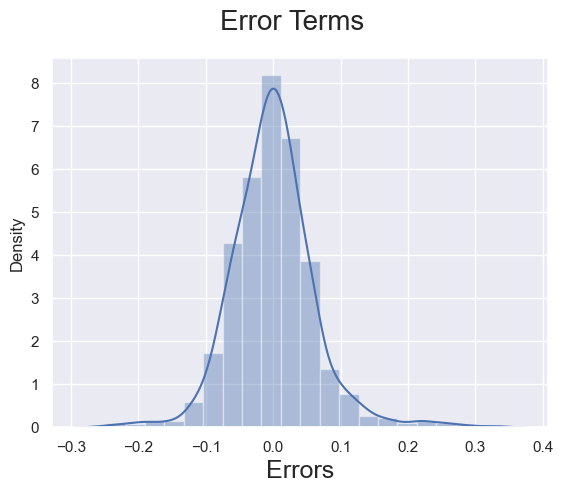

In [779]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Evaluate R2 of Train model

In [780]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.7

In [781]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

3.8885764241425935
0.003808595910031923
0.06171382268205335


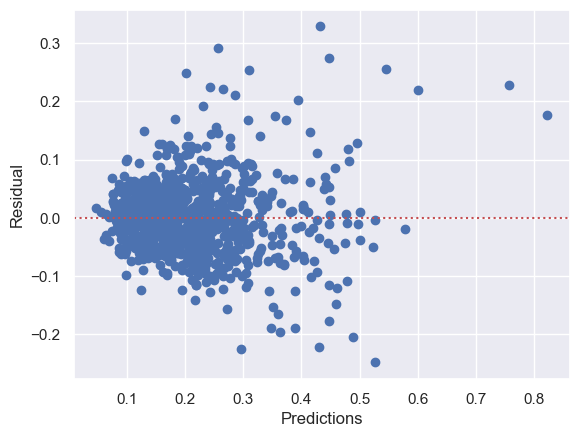

In [782]:
# Residual analysis
y_res = (y_train - y_train_cnst)
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

#### Prediction and Evalution on Test Data

In [783]:
#scale Test set
housing_test[numerical_values_train] = scaler.transform(housing_test[numerical_values_train])
housing_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
789,0.235294,0.050185,0.555556,0.875,0.681159,0.950000,0.098125,0.100638,0.0,0.113014,0.136170,0.139815,0.538015,0.0,0.316872,0.000000,0.0,0.666667,0.5,0.625,0.333333,0.545455,0.000000,0.600000,0.50,0.313117,0.155193,0.307130,0.000000,0.0,0.0,0.0,0.0,0.545455,0.25,0.211915,0,0,1,0,1,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
425,0.235294,0.008893,0.666667,0.875,0.536232,0.700000,0.000000,0.000000,0.0,0.278682,0.106547,0.077546,0.330266,0.0,0.182744,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.272727,0.666667,0.427273,0.25,0.169252,0.000000,0.000000,0.228261,0.0,0.0,0.0,0.0,0.727273,0.75,0.139008,0,0,0,1,1,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
204,0.176471,0.009464,0.444444,0.750,0.543478,0.000000,0.000000,0.055280,0.0,0.174658,0.117840,0.080556,0.273123,0.0,0.162567,0.000000,0.0,0.333333,0.5,0.250,0.333333,0.181818,0.000000,0.436364,0.25,0.169252,0.000000,0.063985,0.000000,0.0,0.0,0.0,0.0,0.272727,0.75,0.104291,0,0,0,1,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
118,0.235294,0.050985,0.666667,0.500,0.855072,0.666667,0.000000,0.260454,0.0,0.086901,0.273813,0.307176,0.737530,0.0,0.534973,0.333333,0.0,1.000000,0.0,0.625,0.333333,0.727273,0.666667,0.818182,0.75,0.418900,0.428238,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,1.00,0.395917,0,0,1,0,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
244,0.235294,0.034631,0.666667,0.500,0.884058,0.866667,0.000000,0.123140,0.0,0.108305,0.155155,0.196759,0.430024,0.0,0.321291,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.454545,0.666667,0.854545,0.50,0.326516,0.000000,0.237660,0.000000,0.0,0.0,0.0,0.0,0.363636,1.00,0.236217,0,0,1,0,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [784]:
housing_test.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,...,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000
mean,0.214612,0.040959,0.563420,0.573345,0.722719,0.598706,0.062394,0.079914,0.024626,0.241718,0.172175,0.176926,0.173099,0.011393,0.204004,0.136986,0.027397,0.522070,0.202055,0.362443,0.350076,0.318804,0.195586,0.717476,0.438356,0.332319,0.112381,0.073669,0.034478,0.004993,0.033281,0.010206,0.003333,0.495226,0.457192,0.198656,0.041096,0.013699,0.796804,0.143836,1.0,0.945205,0.031963,0.029680,0.004566,0.630137,0.041096,0.022831,0.892694,0.0,...,0.027397,0.239726,0.490868,0.020548,0.214612,0.586758,0.011416,0.052511,0.004566,0.280822,0.059361,0.059361,0.292237,0.429224,0.029680,0.018265,0.059361,0.002283,0.885845,0.015982,0.006849,0.059361,0.006849,0.908676,0.020548,0.926941,0.004566,0.004566,0.990868,0.036530,0.105023,0.009132,0.799087,0.963470,0.0,0.031963,0.002283,0.002283,0.0,0.004566,0.002283,0.0,0.073059,0.002283,0.894977,0.0,0.009132,0.015982,0.835616,0.079909
std,0.255235,0.041173,0.146992,0.138721,0.213117,0.329805,0.101240,0.073110,0.093665,0.181768,0.059788,0.082057,0.212428,0.099833,0.099133,0.170272,0.113919,0.182908,0.261435,0.100695,0.076297,0.150989,0.211663,0.213439,0.184252,0.147560,0.139085,0.100341,0.101115,0.047585,0.125326,0.107364,0.029006,0.239707,0.327548,0.103429,0.198739,0.116370,0.402838,0.351324,0.0,0.227839,0.176104,0.169898,0.067496,0.483319,0.198739,0.149535,0.309856,0.0,...,0.163425,0.427404,0.500488,0.142027,0.411022,0.492979,0.106353,0.223311,0.067496,0.449915,0.236569,0.236569,0.455311,0.495531,0.169898,0.134061,0.236569,0.047782,0.318363,0.125548,0.082571,0.236569,0.082571,0.288399,0.142027,0.260531,0.067496,

In [785]:
#create y_test and X_test
y_test = housing_test.pop('SalePrice')
X_test = housing_test

In [786]:
#trained model columns
X_train_new.columns

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'PoolArea',
       'Condition2_PosN', 'RoofMatl_WdShngl', 'BsmtFinType2_None',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'PoolQC_Gd'],
      dtype='object')

In [787]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [788]:
# Making predictions
y_pred = lm.predict(X_test_new)


In [789]:
#check R2 value for test data set
print(r2_score(y_test, y_pred))

0.36322930906561635


#### calculate r2 score of Test model

In [790]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.36

In [791]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

2.9768105122042954
0.006796371032429898
0.08244010572791557


In [792]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [793]:
#check final VIf of columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,BsmtFinSF1,2.40
9,KitchenQual_Gd,1.95
0,LotArea,1.91
10,KitchenQual_TA,1.87
3,2ndFlrSF,1.75
1,MasVnrArea,1.52
11,PoolQC_Gd,1.50
4,PoolArea,1.49
7,BsmtFinType2_None,1.08
5,Condition2_PosN,1.06


Text(0, 0.5, 'y_pred')

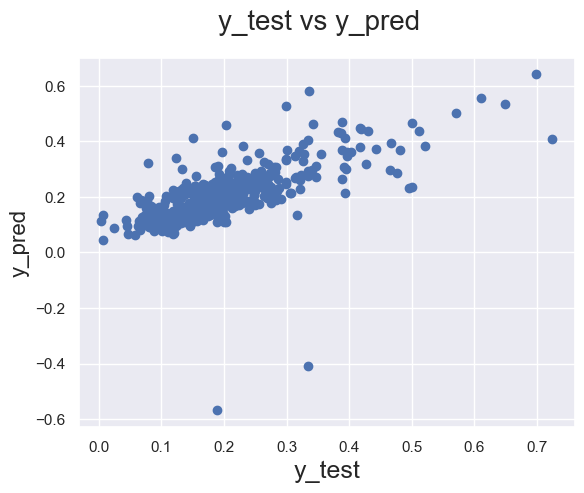

In [794]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [804]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.702511076786638
0.36322930906561635
3.8885764241425935
2.9768105122042954
0.003808595910031923
0.006796371032429898


#### Outcome

Variables - 12  'LotArea', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'PoolArea',
       'Condition2_PosN', 'RoofMatl_WdShngl', 'BsmtFinType2_None',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'PoolQC_Gd' <br>
train data r2 score = 0.70 <br>
test data r2 score = 0.36

#### Ridge 

In [795]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [796]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.6}


In [797]:
#Fitting Ridge model for alpha = 0.6 and printing coefficients which have been penalised
alpha = 0.6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 0.28412089  0.20815901  0.29224412  0.11934036  0.06554687 -0.17670584
  0.13878239 -0.02102586 -0.22778046 -0.12223871 -0.20350762 -0.44437462]


In [798]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.6902331648553763
0.539015011471432
4.049065084889672
2.1550378799730643
0.00396578362868724
0.004920177808157681


#### Lasso

In [815]:
params = {'alpha': [0.0001, 0.001,0.003, 0.005, 0.007, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.003, 0.005, 0.007, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20, 50, 100, 500, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [816]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [801]:

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)

[ 0.3220024   0.20977997  0.32632231  0.12128551  0.09843431 -0.1917155
  0.12413247 -0.01561905 -0.2273241  -0.12226543 -0.20316224 -0.67934392]


In [802]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.698754265874332
0.4449481718603929
3.9376829461124134
2.594786695348161
0.00385669240559492
0.005924170537324568


In [805]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.702511,0.690233,0.698754
1,R2 Score (Test),0.363229,0.539015,0.444948
2,RSS (Train),3.888576,4.049065,3.937683
3,RSS (Test),2.976811,2.155038,2.594787
4,MSE (Train),0.061714,0.062974,0.062102
5,MSE (Test),0.082440,0.070144,0.076969


#### Coefficient changes in different models

In [806]:
# storing coefficeint in dataframe
com_coeff = pd.DataFrame(index=X.columns)
com_coeff.rows = X.columns
com_coeff['Linear'] = lm.params
com_coeff['Ridge'] = ridge.coef_
com_coeff['Lasso'] = lasso.coef_

In [808]:
#display coefficient for differnt models
com_coeff.head(12)

,Linear,Ridge,Lasso
LotArea,0.364665,0.284121,0.322002
MasVnrArea,0.218099,0.208159,0.209780
BsmtFinSF1,0.344503,0.292244,0.326322
2ndFlrSF,0.122426,0.119340,0.121286
PoolArea,0.193752,0.065547,0.098434
Condition2_PosN,-0.258191,-0.176706,-0.191716
RoofMatl_WdShngl,0.140230,0.138782,0.124132
BsmtFinType2_None,-0.016781,-0.021026,-0.015619
KitchenQual_Fa,-0.232381,-0.227780,-0.227324
KitchenQual_Gd,-0.126442,-0.122239,-0.122265


### Question 1 - Double the value of alpha in RIdge & Lasso

In [809]:
#Ridge alpha = 0.6 now take 1.2
alpha = 1.2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train = r2_score(y_train, y_pred_train)
print(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print(r2_test)

[ 0.23772396  0.20302612  0.26491241  0.11646283  0.03571973 -0.1328976
  0.1313003  -0.0233341  -0.22183393 -0.11833649 -0.20038777 -0.29183627]
0.6786525636725154
0.5783200576149494


Cofficient are decreasing with increase of alpha and there is drop in r2 score of train data.

In [811]:
#Lasso alpha = 0.001 now take 0.002
alpha = 0.002
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_new, y_train)
print(lasso.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train = r2_score(y_train, y_pred_train)
print(r2_train)

r2_test = r2_score(y_test, y_pred_test)
print(r2_test)

[ 0.          0.15837132  0.08907666  0.06971322  0.         -0.
  0.         -0.         -0.12078294 -0.05357192 -0.1460731  -0.        ]
0.6786525636725154
0.5783200576149494


More and more cofficient tends to be 0 and there is drop in r2 score.

#### Question 3 : After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

top 5 features are BsmtFinSF1, LotArea, LotArea, 2ndFlrSF, PoolArea

In [817]:
#Drop 5 features from train and test dataset
X_train_new = X_train_new.drop(['BsmtFinSF1', 'LotArea', 'LotArea', '2ndFlrSF'
                               , 'PoolArea'], axis=1)
X_test_new = X_test_new.drop(['BsmtFinSF1', 'LotArea', 'LotArea', '2ndFlrSF'
                               , 'PoolArea'], axis=1)

In [823]:
params = {'alpha': [0.0001, 0.001,0.003, 0.005, 0.007, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 31 candidates, totalling 155 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.003, 0.005, 0.007, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20, 50, 100, 500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [824]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [827]:
#Fitting Ridge model for alpha = 0.6 and printing coefficients which have been penalised
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_new, y_train)
print(lasso.coef_)

[ 0.23285886 -0.          0.         -0.01992254 -0.19615722 -0.09730325
 -0.19194984 -0.        ]


In [830]:
X_train_new.columns

Index(['MasVnrArea', 'Condition2_PosN', 'RoofMatl_WdShngl',
       'BsmtFinType2_None', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'PoolQC_Gd'],
      dtype='object')

In [828]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.5330573142829276
0.5058326516569325


After dropping 5 main variables, r2 score is low for test nad train data